In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Data/process/8#Belt Conveyer_merged.csv")
df.shape

(773280, 19)

In [2]:
df.columns

Index(['datetime', 'location', 'High-Frequency Acceleration',
       'Low-Frequency Acceleration Z', 'Temperature', 'Vibration Velocity Z',
       'Device', 'alignment_status', 'bearing_lubrication', 'crest_factor',
       'electromagnetic_status', 'fit_condition', 'kurtosis_opt',
       'peak_value_opt', 'rms_10_25khz', 'rms_1_10khz', 'rotor_balance_status',
       'rubbing_condition', 'velocity_rms'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773280 entries, 0 to 773279
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   datetime                      773280 non-null  object 
 1   location                      773280 non-null  object 
 2   High-Frequency Acceleration   772286 non-null  float64
 3   Low-Frequency Acceleration Z  772286 non-null  float64
 4   Temperature                   773280 non-null  float64
 5   Vibration Velocity Z          772286 non-null  float64
 6   Device                        768621 non-null  object 
 7   alignment_status              768621 non-null  float64
 8   bearing_lubrication           768621 non-null  float64
 9   crest_factor                  767904 non-null  float64
 10  electromagnetic_status        767904 non-null  float64
 11  fit_condition                 768621 non-null  float64
 12  kurtosis_opt                  768621 non-nul

In [4]:
df.head()

,datetime,location,High-Frequency Acceleration,Low-Frequency Acceleration Z,Temperature,Vibration Velocity Z,Device,alignment_status,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,peak_value_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
0,2025-04-01 00:00:00,Gear Reducer,1.66156,1.58601,38.8,2.10817,8#Belt Conveyer,87.60,97.33,89.46,98.0,90.28,85.64,90.46,98.0,96.92,80.49,96.03,70.13
1,2025-04-01 00:00:00,Gearbox First Shaft Input End,2.83816,2.45478,41.5,2.46951,8#Belt Conveyer,87.60,97.33,89.46,98.0,90.28,85.64,90.46,98.0,96.92,80.49,96.03,70.13
2,2025-04-01 00:00:00,Motor Drive End,2.57576,2.00625,19.6,7.17157,8#Belt Conveyer,87.60,97.33,89.46,98.0,90.28,85.64,90.46,98.0,96.92,80.49,96.03,70.13
3,2025-04-01 00:00:05,Gear Reducer,1.76099,1.67884,38.8,2.74165,8#Belt Conveyer,81.82,97.20,90.18,98.0,88.27,85.67,91.07,98.0,96.96,81.14,95.72,70.20
4,2025-04-01 00:00:05,Gearbox First Shaft Input End,2.95441,2.52789,41.5,2.15530,8#Belt Conveyer,81.82,97.20,90.18,98.0,88.27,85.67,91.07,98.0,96.96,81.14,95.72,70.20


In [5]:
df.sample(5)

,datetime,location,High-Frequency Acceleration,Low-Frequency Acceleration Z,Temperature,Vibration Velocity Z,Device,alignment_status,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,peak_value_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
636886,2025-04-13 07:43:10,Gearbox First Shaft Input End,2.65994,2.36655,43.2,2.48102,8#Belt Conveyer,82.21,97.74,91.61,98.0,85.32,87.08,91.07,98.0,97.06,88.39,98.56,69.32
152220,2025-04-03 22:34:05,Gear Reducer,1.59809,1.51646,41.5,1.90029,8#Belt Conveyer,80.63,97.66,89.85,98.0,87.76,86.81,89.89,98.0,96.90,83.85,96.66,70.56
493420,2025-04-10 12:45:10,Gearbox First Shaft Input End,2.81073,2.50035,48.2,2.47476,8#Belt Conveyer,80.60,97.07,91.84,98.0,90.50,86.60,91.35,98.0,96.88,85.62,97.98,64.70
634381,2025-04-13 06:32:20,Gearbox First Shaft Input End,2.95726,2.52588,43.1,1.98575,8#Belt Conveyer,87.55,97.75,91.68,98.0,90.94,86.73,90.52,98.0,96.95,83.41,98.21,71.20
469016,2025-04-10 01:27:15,Gear Reducer,1.68693,1.62980,44.4,2.18983,8#Belt Conveyer,87.57,96.53,91.01,98.0,91.26,86.45,91.31,98.0,96.82,83.74,97.70,65.79


In [6]:
df.describe()

,High-Frequency Acceleration,Low-Frequency Acceleration Z,Temperature,Vibration Velocity Z,alignment_status,bearing_lubrication,crest_factor,electromagnetic_status,fit_condition,kurtosis_opt,peak_value_opt,rms_10_25khz,rms_1_10khz,rotor_balance_status,rubbing_condition,velocity_rms
count,772286.000000,772286.000000,773280.000000,772286.000000,768621.000000,768621.000000,767904.000000,767904.0,768621.000000,768621.000000,768621.000000,768621.0,768621.000000,768621.000000,768621.000000,768621.000000
mean,2.318238,2.069329,37.157518,3.743099,83.755039,97.249472,91.114189,98.0,88.167357,86.326866,91.112459,98.0,96.969764,85.006744,97.710218,68.836093
std,0.532135,0.422672,10.274997,2.119473,3.254441,0.302928,0.830653,0.0,2.564379,0.847527,0.686838,0.0,0.122036,2.411656,0.651466,2.744594
min,0.037160,0.015410,3.200000,0.047930,75.000000,96.360000,88.100000,98.0,80.330000,82.800000,87.610000,98.0,96.720000,80.000000,94.610000,62.650000
25%,1.803390,1.704640,28.900000,2.222040,81.200000,97.040000,90.660000,98.0,86.850000,86.030000,90.700000,98.0,96.880000,83.290000,97.420000,67.000000
50%,2.301740,2.052245,40.600000,2.731920,83.150000,97.240000,91.310000,98.0,88.960000,86.610000,91.140000,98.0,96.950000,85.080000,97.830000,68.600000
75%,2.797880,2.420430,45.000000,5.870355,86.570000,97.470000,91.710000,98.0,89.990000,86.900000,91.560000,98.0,97.040000,87.000000,98.120000,70.400000
max,55.846150,55.771680,54.100000,416.852600,94.020000,98.000000,92.760000,98.0,95.020000,87.660000,93.410000,98.0,97.420000,96.250000,98.950000,85.090000


In [7]:
print(df.isnull().sum())

datetime                           0
location                           0
High-Frequency Acceleration      994
Low-Frequency Acceleration Z     994
Temperature                        0
Vibration Velocity Z             994
Device                          4659
alignment_status                4659
bearing_lubrication             4659
crest_factor                    5376
electromagnetic_status          5376
fit_condition                   4659
kurtosis_opt                    4659
peak_value_opt                  4659
rms_10_25khz                    4659
rms_1_10khz                     4659
rotor_balance_status            4659
rubbing_condition               4659
velocity_rms                    4659
dtype: int64


In [8]:
cleaned_data = df.dropna(axis=0)
print(cleaned_data.isna().sum())

datetime                        0
location                        0
High-Frequency Acceleration     0
Low-Frequency Acceleration Z    0
Temperature                     0
Vibration Velocity Z            0
Device                          0
alignment_status                0
bearing_lubrication             0
crest_factor                    0
electromagnetic_status          0
fit_condition                   0
kurtosis_opt                    0
peak_value_opt                  0
rms_10_25khz                    0
rms_1_10khz                     0
rotor_balance_status            0
rubbing_condition               0
velocity_rms                    0
dtype: int64


In [9]:
features = [
    'High-Frequency Acceleration', 'Low-Frequency Acceleration Z',
    'Temperature', 'Vibration Velocity Z'
]

targets = [
    'alignment_status', 'bearing_lubrication', 'crest_factor', 'electromagnetic_status',
    'fit_condition', 'kurtosis_opt', 'rms_10_25khz', 'rms_1_10khz',
    'rotor_balance_status', 'rubbing_condition', 'velocity_rms', 'peak_value_opt'
]

### Exploring Feature Columns

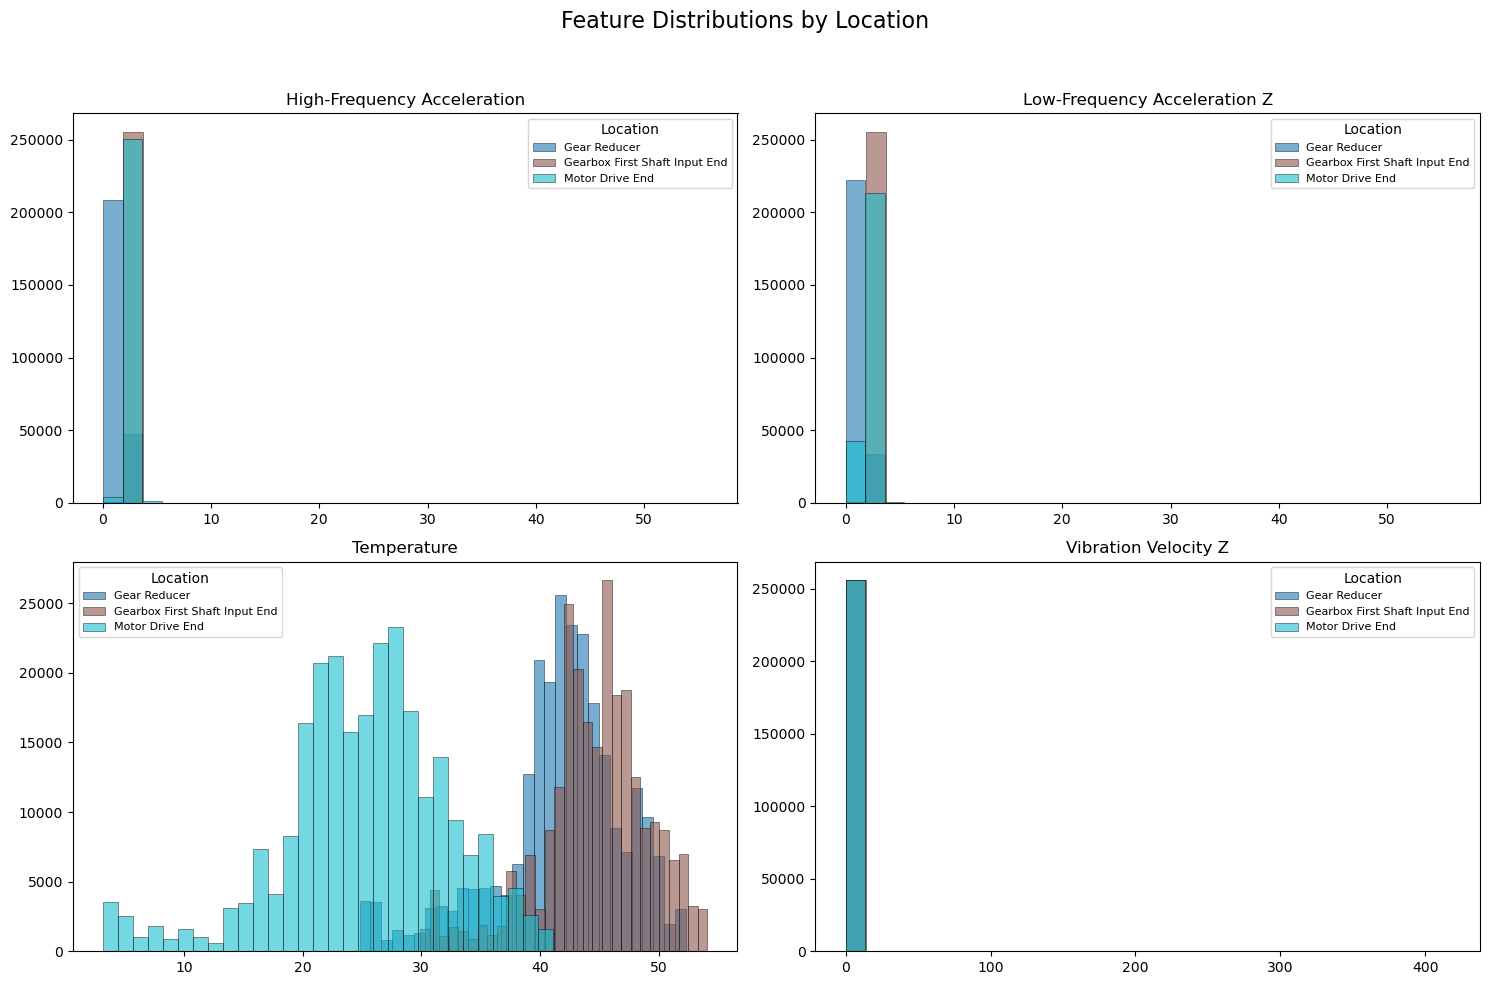

In [10]:
locations = cleaned_data['location'].unique()
colors = plt.get_cmap('tab10', len(locations))

num_features = len(features)
cols = 2
rows = (num_features + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), squeeze=False)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    ax = axes[row][col]
    for i, loc in enumerate(locations):
        subset = cleaned_data[cleaned_data['location'] == loc]
        ax.hist(subset[feature].dropna(), bins=30, alpha=0.6,
                label=loc, color=colors(i), edgecolor='black', linewidth=0.5)
    ax.set_title(feature)
    ax.legend(title='Location', fontsize=8)

for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j // cols][j % cols])

plt.suptitle('Feature Distributions by Location', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../docs/images/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

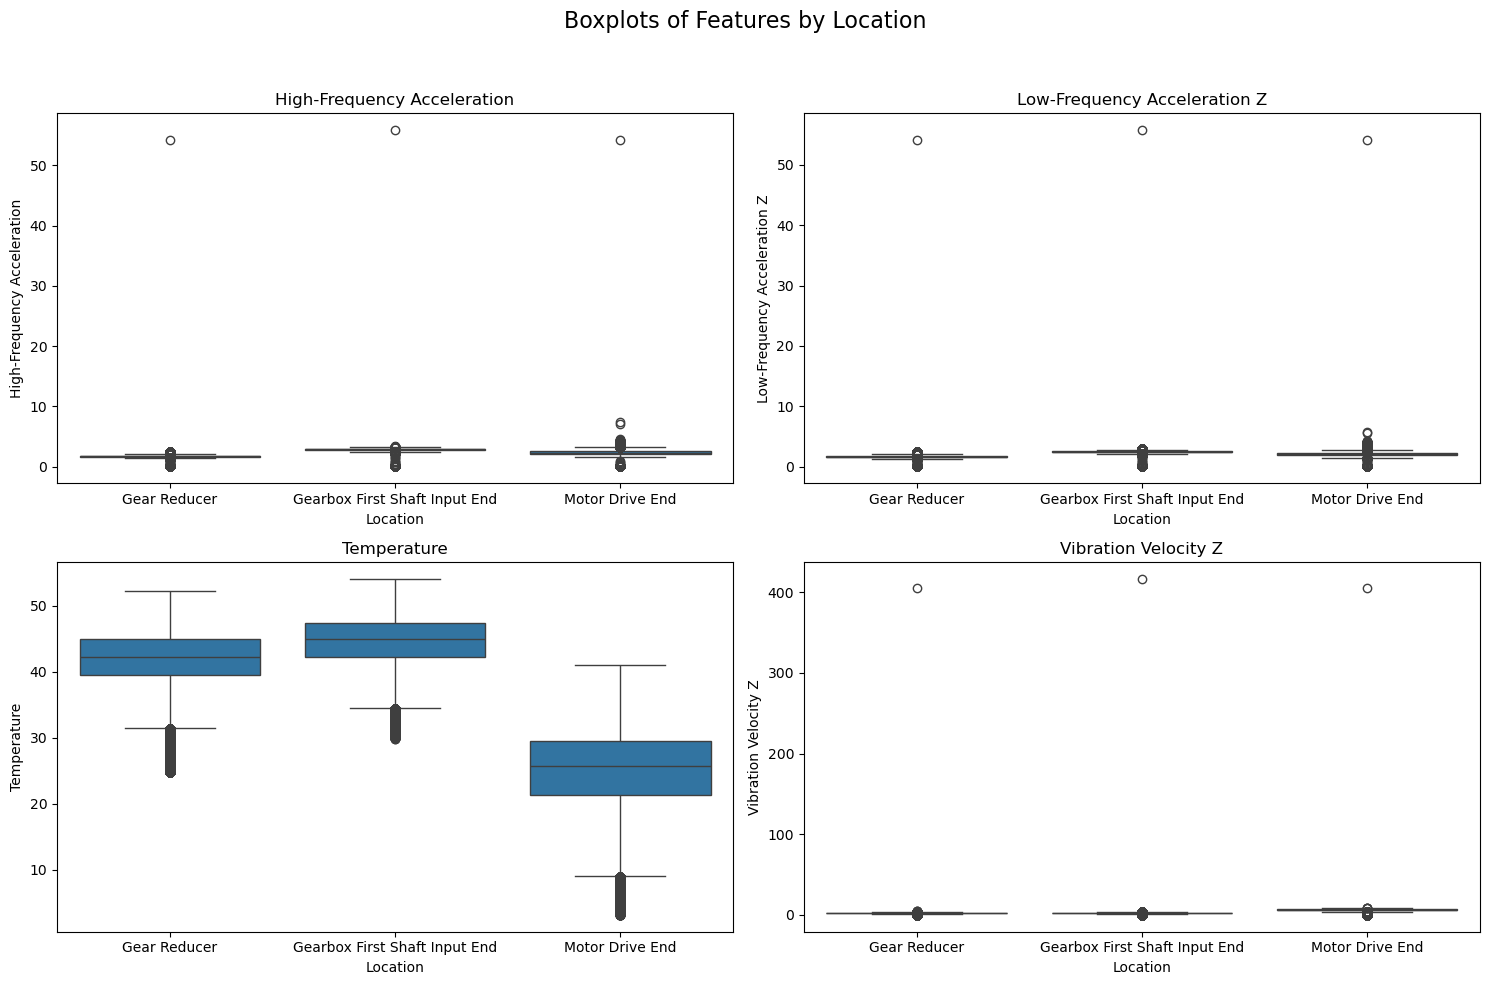

In [11]:
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

plt.suptitle('Boxplots of Features by Location', fontsize=16)

for i, col in enumerate(features):
    sns.boxplot(data=cleaned_data, x='location', y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Location')
    axes[i].set_ylabel(col)

# Remove unused subplots
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../docs/images/feature_box_plot.png', dpi=300, bbox_inches='tight')
plt.show()

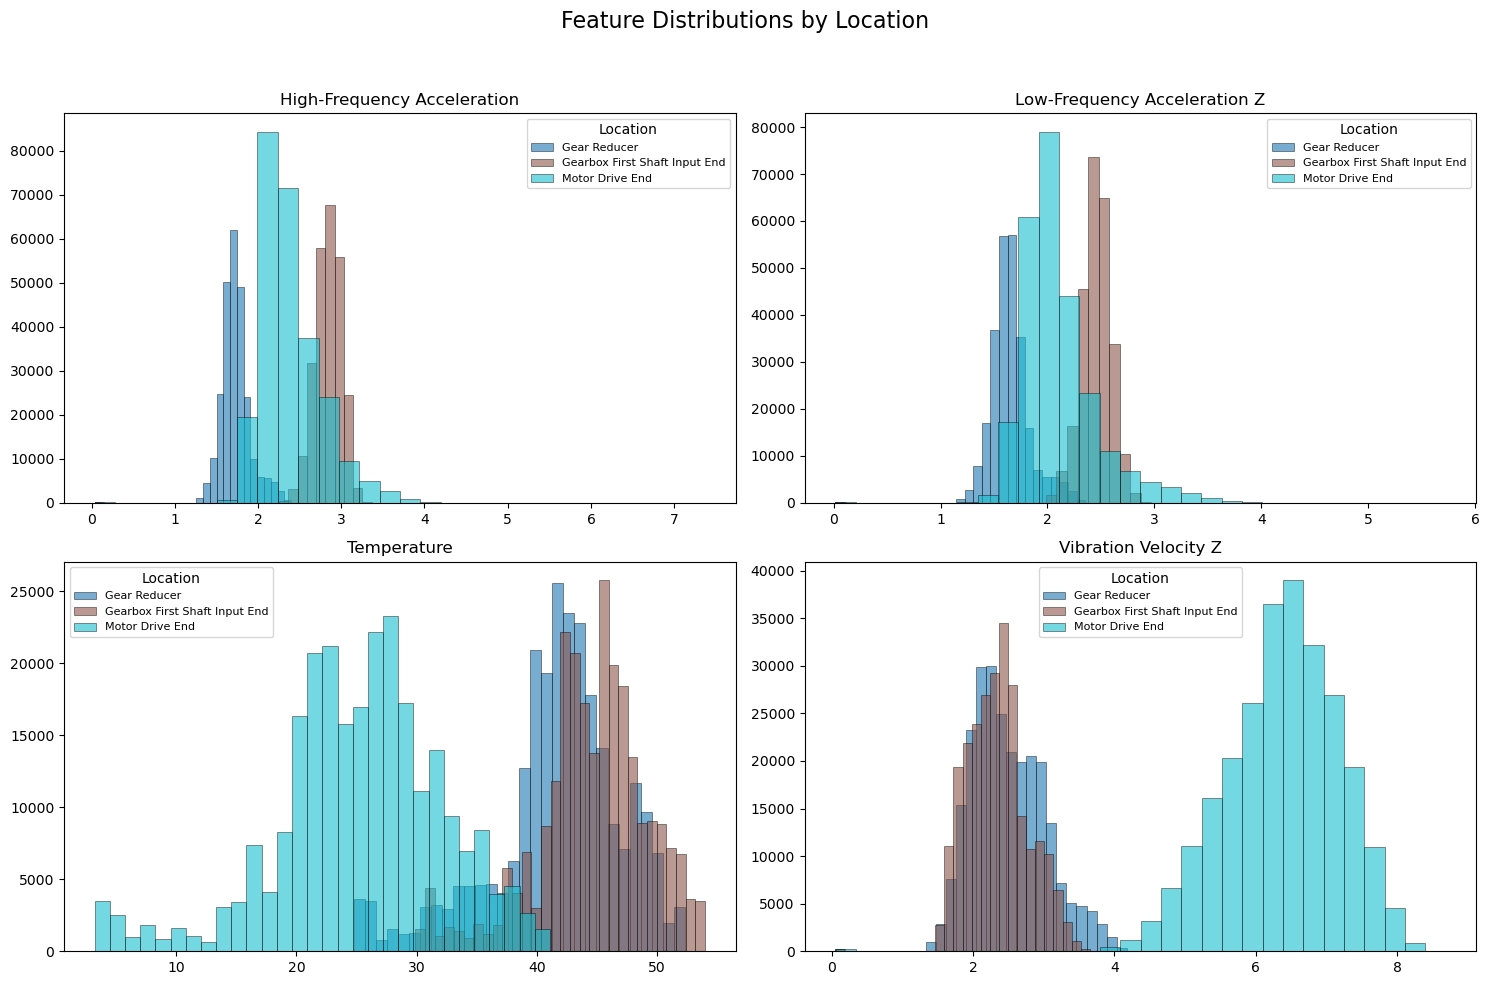

In [12]:
filtered_data = cleaned_data.copy()

for col in features:
    max_val = filtered_data[col].max()
    filtered_data = filtered_data[filtered_data[col] != max_val]

locations = filtered_data['location'].unique()
colors = plt.get_cmap('tab10', len(locations))

num_features = len(features)
cols = 2
rows = (num_features + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), squeeze=False)

for idx, feature in enumerate(features):
    row, col = divmod(idx, cols)
    ax = axes[row][col]
    for i, loc in enumerate(locations):
        subset = filtered_data[filtered_data['location'] == loc]
        ax.hist(subset[feature].dropna(), bins=30, alpha=0.6,
                label=loc, color=colors(i), edgecolor='black', linewidth=0.5)
    ax.set_title(feature)
    ax.legend(title='Location', fontsize=8)

for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j // cols][j % cols])

plt.suptitle('Feature Distributions by Location', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../docs/images/feature_distributions_rm_max.png', dpi=300, bbox_inches='tight')
plt.show()


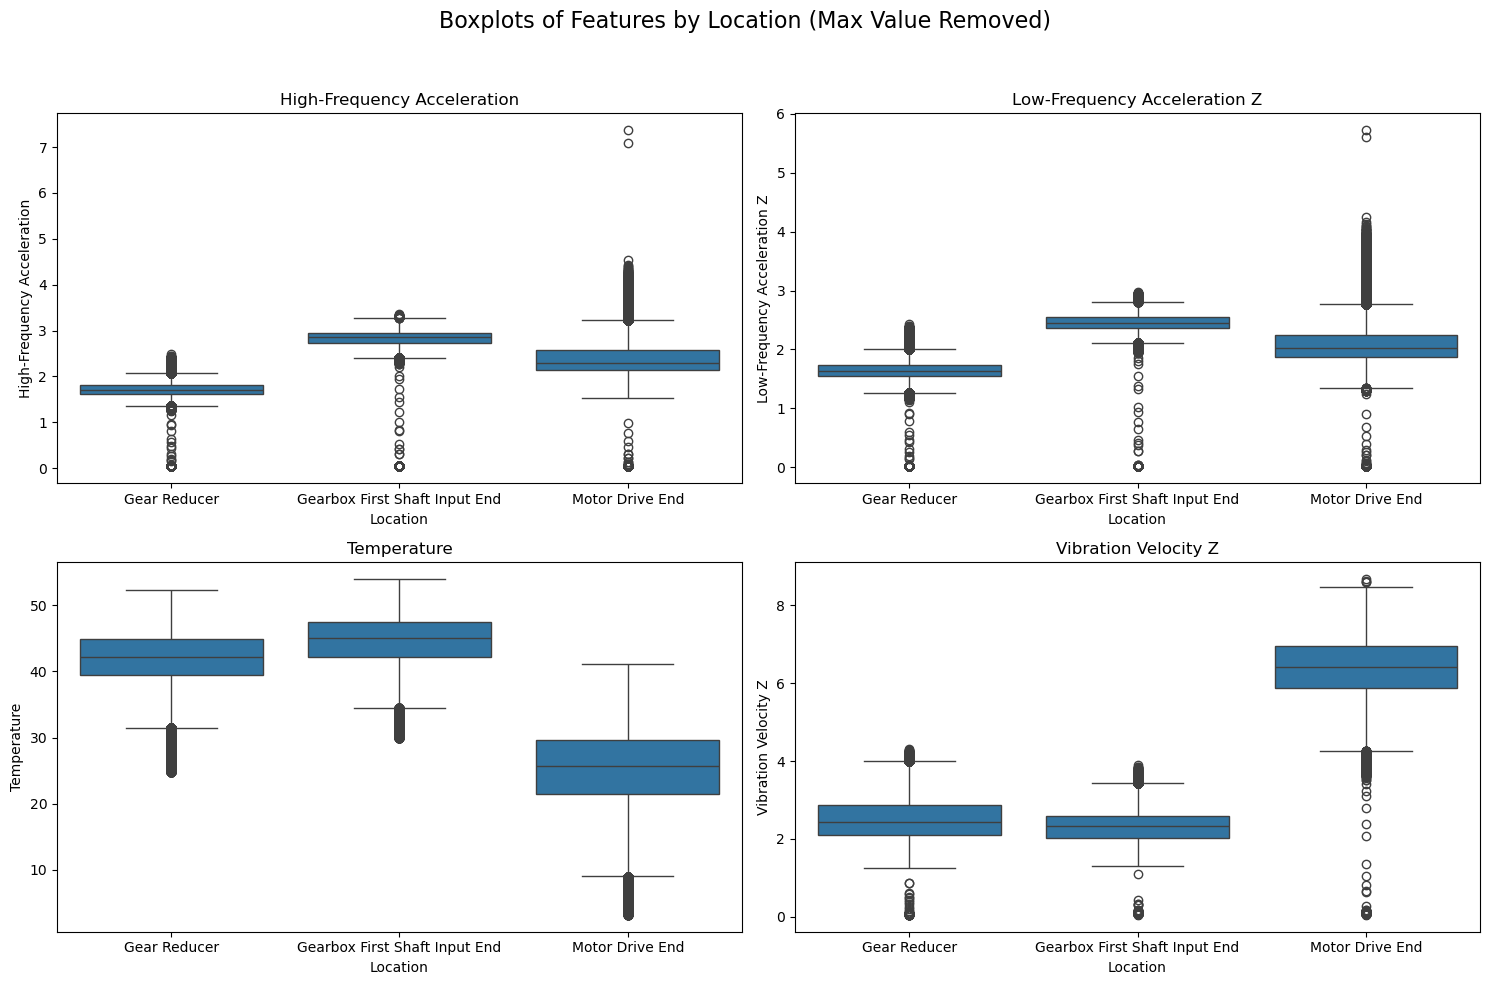

In [13]:
n_rows, n_cols = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

plt.suptitle('Boxplots of Features by Location (Max Value Removed)', fontsize=16)

# Draw boxplots
for i, col in enumerate(features):
    sns.boxplot(data=filtered_data, x='location', y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Location')
    axes[i].set_ylabel(col)

# Remove any extra axes if features < grid size
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../docs/images/feature_box_plot_rm_max.png', dpi=300, bbox_inches='tight')
plt.show()

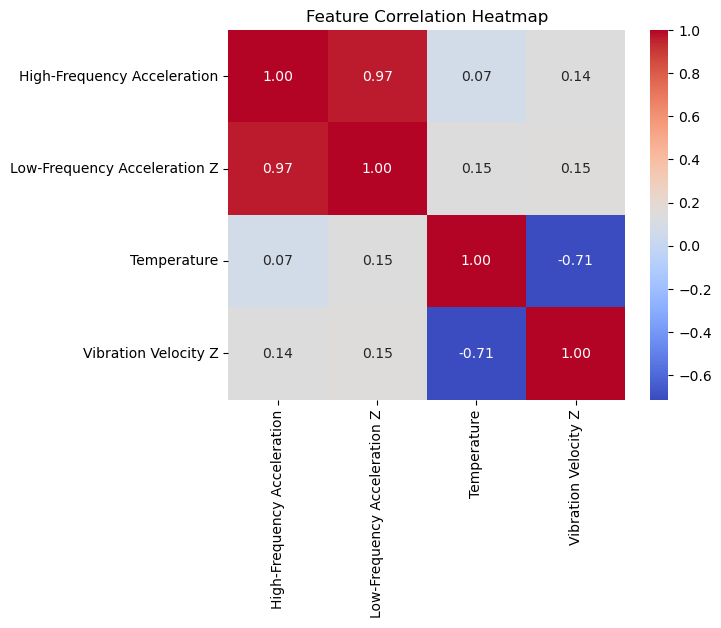

In [14]:
sns.heatmap(cleaned_data[features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.savefig('../docs/images/feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Exploring Target Columns

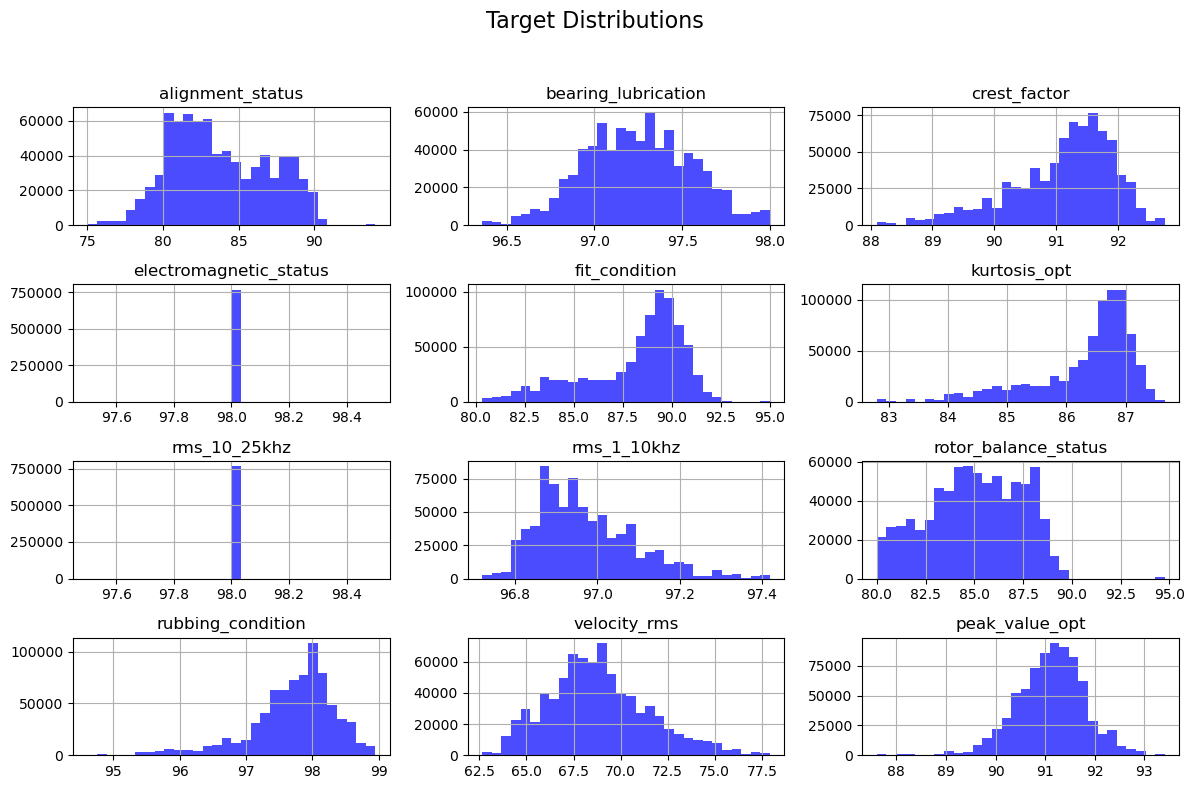

In [15]:
cleaned_data[targets].hist(bins=30, figsize=(12, 8), color='blue', alpha=0.7)
plt.suptitle('Target Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('../docs/images/target_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

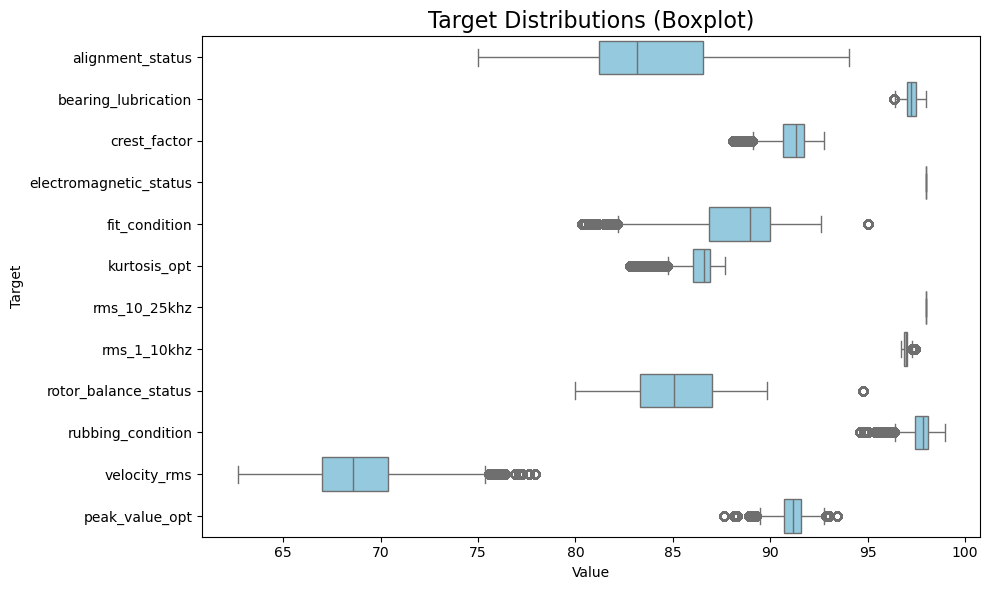

In [17]:
target_data_long = cleaned_data[targets].melt(var_name='Target', value_name='Value')

# Create horizontal boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=target_data_long, y='Target', x='Value', color='skyblue')

plt.title('Target Distributions (Boxplot)', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Target')
plt.tight_layout()
plt.savefig('../docs/images/target_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()